1. Plot Gaussian Distribution
2. Plot Uniform Distribution

In [ ]:
# 1. Gaussian Distribution :
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Generate a large dataset (using numpy.random.normal) to simulate a population (mean=50, std = 10)
population = np.random.normal(loc=50, scale=10, size=1000)
# Function to perform uniform smapling
def uniform_sampling(population, sample_size):
  indices = np.random.choice(len(population), sample_size, replace=False)
  sample = [population[i] for i in indices]
  return sample

# Sample Size
sample_size_1 = 100
sample_size_2 = 200

# Perform Uniform sampling to get a sample from the population :
sample1 = uniform_sampling(population, sample_size_1)
sample2 = uniform_sampling(population, sample_size_2)

In [ ]:
sample1[0:5]

[52.32329199067463,
 48.986717970434746,
 42.76276088794481,
 55.252360607625576,
 53.44131426410579]

<Axes: ylabel='Count'>

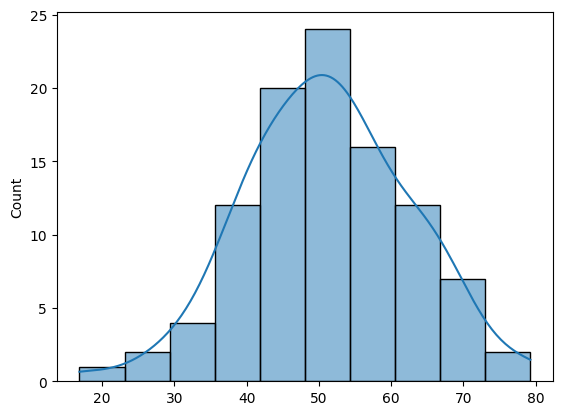

In [ ]:
# Ploting the sample 1 - Histplot
sns.histplot(sample1,kde=True)

<Axes: ylabel='Count'>

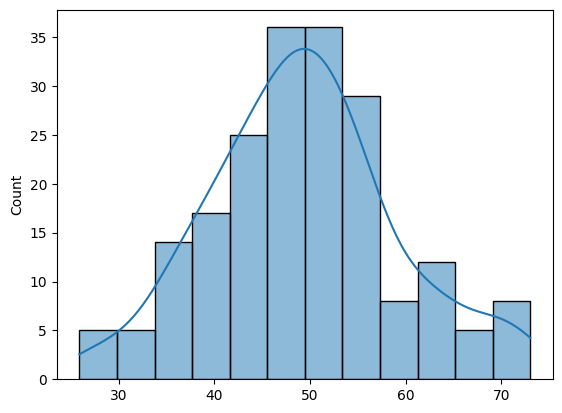

In [ ]:
sns.histplot(sample2,kde=True)

In [ ]:
# Let's check the mean and the variance of the given function :
min_sample_1 = min(sample1)
max_sample_1 = max(sample1)

print("Minimum value = {0} and the Maximum value = {1}.".format(min_sample_1,max_sample_1))

Minimum value = 16.852601127804974 and the Maximum value = 79.27070869968748.


In [ ]:
Actual_mean = np.mean(sample1)
Actual_variance = np.var(sample1)
Actual_sd = np.std(sample1)

print("Mean of the sample = {0} and the Variance of the sample = {1}.".format(Actual_mean,Actual_variance))

Mean of the sample = 51.088202155069645 and the Variance of the sample = 128.12302369635756.


In [ ]:
# Now calculate using formula :
def mean_cal(a,b):
  return (a+b)/2

def var_cal(a,b):
  nu = (a-b)**2
  return nu/12

print("Calculted Mean of the sample = {0} and the Calculated Variance of the sample = {1}.".format(mean_cal(min_sample_1,max_sample_1),var_cal(min_sample_1,max_sample_1)))

Calculted Mean of the sample = 48.061654913746224 and the Calculated Variance of the sample = 324.668346071258.


In [ ]:
# Estimting the Mean and Standard Deviation of the samples : (Sir)
sample1[0:5]

[52.32329199067463,
 48.986717970434746,
 42.76276088794481,
 55.252360607625576,
 53.44131426410579]

In [ ]:
sample_size_1

100

In [ ]:
# Sir, code :
sample_mean = np.mean(sample1)
sample_std = np.std(sample1, ddof=1)

# 1. Confidence Interval for the Mean
confidence_level = 0.95
alpha = 1 - confidence_level
t_critical = stats.t.ppf(1-alpha/2, df=sample_size_1-1)
margine_of_error = t_critical * (sample_std / np.sqrt(sample_size_1))

# Confidence Interval :
confidence_interval = (sample_mean - margine_of_error, sample_mean + margine_of_error)
print(f"Sample Mean: {sample_mean:.2f}")
print(f"Sample Standard Deviation: {sample_std:.2f}")
print(f"{confidence_level*100:.0f}% Confidence Interval for the mean: {confidence_interval}")

Sample Mean: 51.09
Sample Standard Deviation: 11.38
95% Confidence Interval for the mean: (48.83092363983398, 53.34548067030531)


In [ ]:
# 2. Hypothesis Testing (One-Sample t-test)
# Null hypothesis : Mean of the population is 50
hypothesized_mean = 50
t_statistics, p_value = stats.ttest_1samp(sample1, hypothesized_mean)

print(f"T-statistics : {t_statistics:.2f}")
print(f"P-value : {p_value:.4f}")

T-statistics : 0.96
P-value : 0.3411


In [ ]:
# Decision based on p-value :
if p_value < alpha:
  print(f"Reject the null hypothesis : The sample mean significantly differs from {hypothesized_mean:.2f}")
else:
  print(f"Failed to reject the null hypothesis : The sample mean does not significantly differs from hypothesis mean")

Failed to reject the null hypothesis : The sample mean does not significantly differs from hypothesis mean
